<a href="https://colab.research.google.com/github/rishav24x7/ArgoandCrossplane/blob/main/Copy_of_iris_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Data Analysis with Iris Dataset

In this notebook, we will:
- Import the Iris dataset using `pandas.read_csv`
- Perform statistical analysis (mean, median, mode, IQR)
- Explore multiple variables together
- Visualize distributions, boxplots, scatter plots, and conditional plots


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Load the Iris Dataset

In [ ]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Descriptive Statistics

In [ ]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## Mean, Median, Mode, and IQR of Sepal Length

In [ ]:
sl = df['sepal_length']

mean_sl = sl.mean()
median_sl = sl.median()
mode_sl = sl.mode()[0]

Q1 = sl.quantile(0.25)
Q3 = sl.quantile(0.75)
IQR = Q3 - Q1

mean_sl, median_sl, mode_sl, Q1, Q3, IQR

(np.float64(5.843333333333334),
 5.8,
 np.float64(5.0),
 np.float64(5.1),
 np.float64(6.4),
 np.float64(1.3000000000000007))

## Distribution of Sepal Length

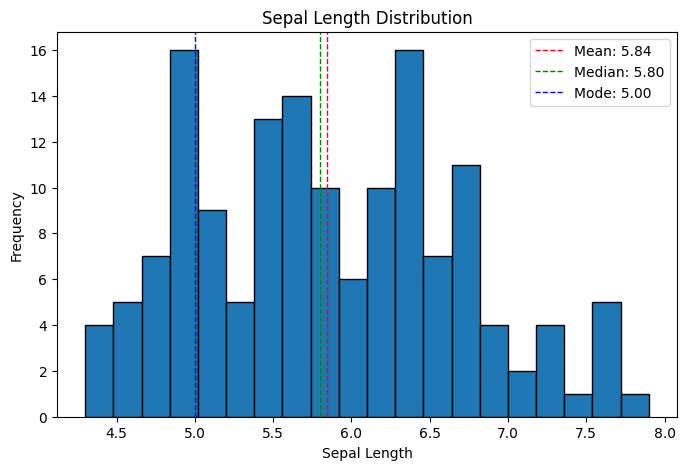

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(sl, bins=20, edgecolor='black')
plt.axvline(mean_sl, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_sl:.2f}')
plt.axvline(median_sl, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_sl:.2f}')
plt.axvline(mode_sl, color='blue', linestyle='dashed', linewidth=1, label=f'Mode: {mode_sl:.2f}')
plt.legend()
plt.title('Sepal Length Distribution')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.show()

## Boxplots of All Numeric Features

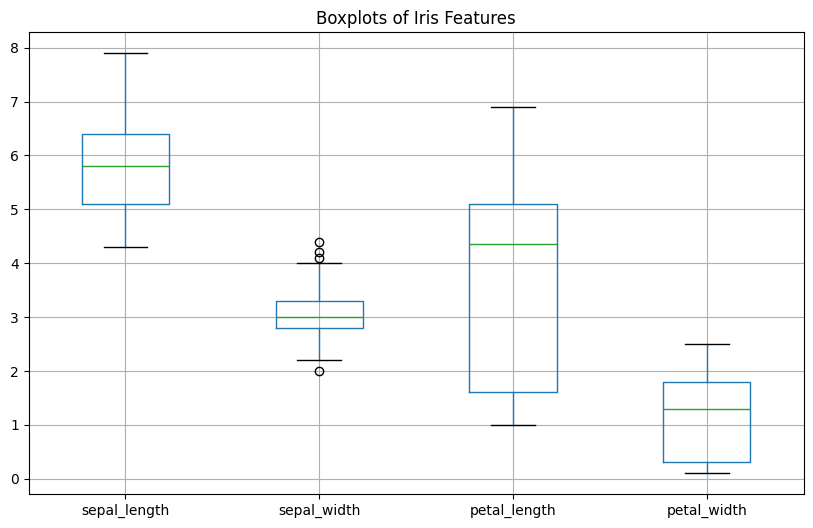

In [ ]:
plt.figure(figsize=(10,6))
df.drop(columns=['species']).boxplot()
plt.title('Boxplots of Iris Features')
plt.show()

## Scatter Plot: Sepal Length vs Petal Length

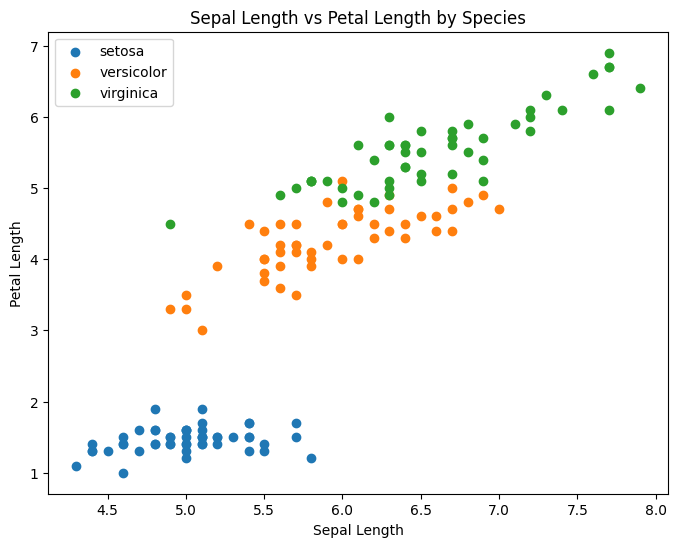

In [ ]:
plt.figure(figsize=(8,6))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal_length'], subset['petal_length'], label=species)

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Sepal Length vs Petal Length by Species')
plt.legend()
plt.show()

## Average Feature Values by Species

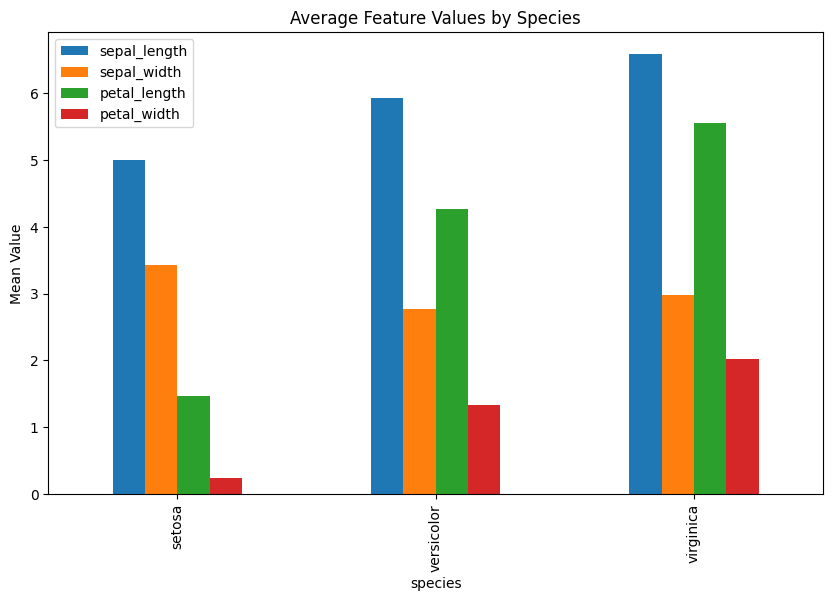

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [ ]:
grouped_means = df.groupby('species').mean()
grouped_means.plot(kind='bar', figsize=(10,6))
plt.title('Average Feature Values by Species')
plt.ylabel('Mean Value')
plt.show()
grouped_means

## Pairwise Relationships (Scatter Matrix)

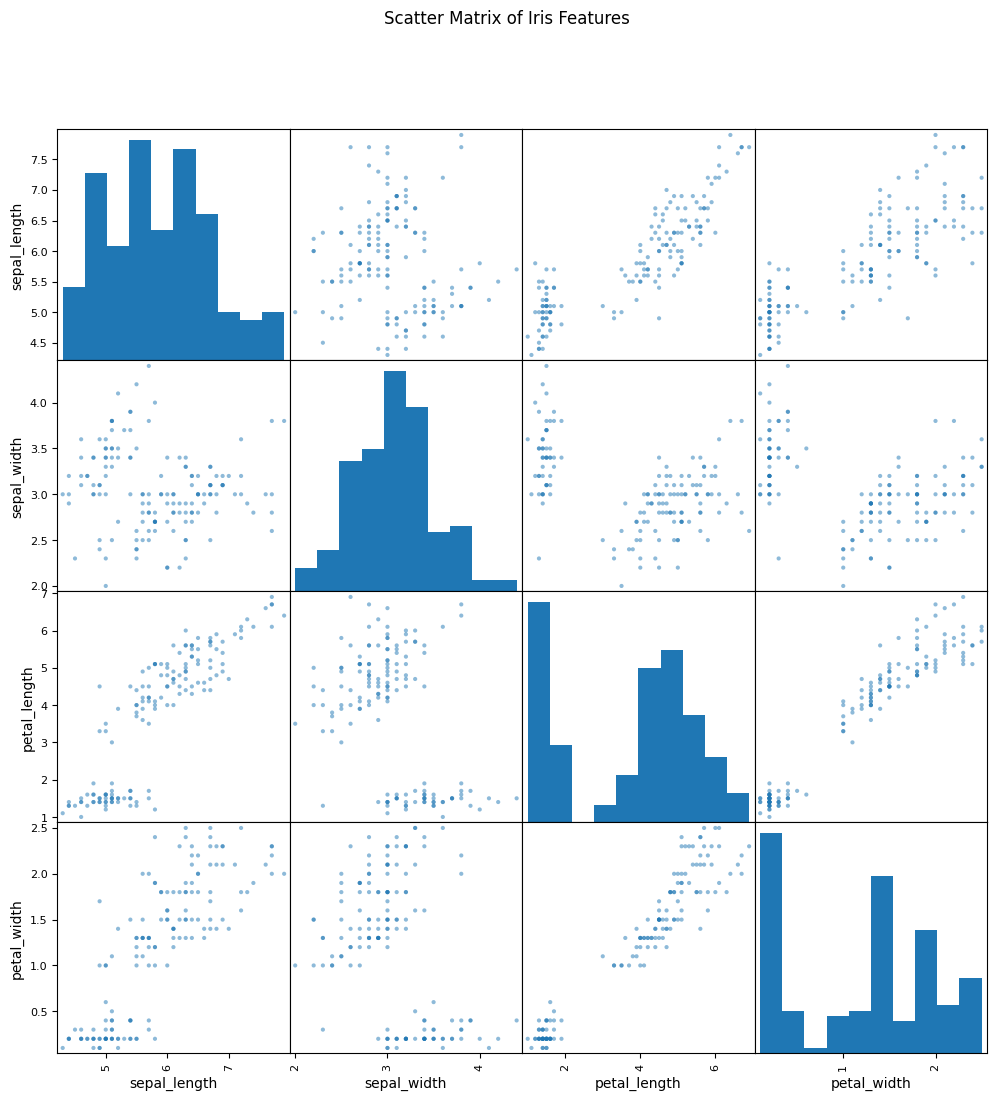

In [ ]:
pd.plotting.scatter_matrix(df.drop(columns=['species']), figsize=(12,12), diagonal='hist')
plt.suptitle('Scatter Matrix of Iris Features')
plt.show()